# Life Expectancy By Country

Over the course of the past few centuries, technological and medical advancements have helped increase the life expectancy of humans. However, as of now, the average life expectancy of humans varies depending on what country you live in.

In this project, we will investigate a dataset containing information about the average life expectancy in 158 different countries and, using statistical instruments, analyse an example country's location on a GDP scale based on the average life expectancy of this country.


## Data Investigation

To begin, let’s import all necessary libraries and a dataset containing the life expectancy in different countries into the variable named data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("country_data.csv")

After that let’s get a sense of what this data looks like and see the first 5 rows of the dataset. If we look at the names of the columns we would notice that the dataset contains 3 columns: Country, Life Expectancy and GDP.

In [2]:
print(data.head())

               Country  Life Expectancy          GDP
0          Afghanistan         58.19375   340.015425
1              Albania         75.15625  2119.726679
2              Algeria         73.61875  2847.853392
3               Angola         49.01875  1975.143045
4  Antigua and Barbuda         75.05625  9759.305728


For our goals we need specific info, so let's isolate the column that contains the life expectancy and store it in a variable named `life_expectancy`. 

In [3]:
life_expectancy = data['Life Expectancy']

Now we are going to use NumPy to find the quartiles of the life expectancy data. The quartiles split the data into four groups of equal size.

In [4]:
life_expectancy_quartiles = np.quantile(life_expectancy, [0.25, 0.5, 0.75])
print(life_expectancy_quartiles)

[62.325     72.525     75.4421875]


Finding quartiles is a common way to communicate a high-level overview of a dataset. By doing this, we can then say whether a new data point falls in the first, second, third, or fourth quarter of the data. 

So by looking at these three values we can get a sense of the spread of the data. For example, it seems like some of the data is fairly close together — a quarter of the data is between 72.5 years and 75.4 years. 

Also, we can already take an example country and apply our measurements to it.  Let's examine a country with a life expectancy of some 70 years. Based on current quartiles values, we can say that it would fall into the second quartile. But this statistical measurement is determined by only one column, therefore one feature of our data set, which is not very enlightening, so let's add the GDP factor and see what result we would be able to get out of it. 

## Splitting the Data by GDP

GDP is a mesaure of a country’s wealth. Let’s now use the GDP data to see if life expectancy is affected by this value. Let’s split the data into two groups based on GDP. If we find the median GDP, we can create two datasets for "low GDP countries" and "high GDP countries".

To start, let’s isolate the GDP column and store it in a variable named `gdp`.

In [5]:
gdp = data['GDP']

Now we now want to find the median GDP.

In [6]:
median_gdp = np.quantile(gdp, 0.5)
print(median_gdp)

2938.0781152500003


Let’s now grab all of the rows from our original dataset that have a GDP less than or equal to the median. 

In [7]:
low_gdp = data[data['GDP'] <= median_gdp]
print(low_gdp)

         Country  Life Expectancy          GDP
0    Afghanistan         58.19375   340.015425
1        Albania         75.15625  2119.726679
2        Algeria         73.61875  2847.853392
3         Angola         49.01875  1975.143045
6        Armenia         73.40000  1999.986318
..           ...              ...          ...
151      Ukraine         69.93750  1577.293329
154   Uzbekistan         68.03125   651.092359
155      Vanuatu         71.38750  2000.245518
156       Zambia         53.90625   811.811841
157     Zimbabwe         50.48750   410.980194

[79 rows x 3 columns]


Now we are going to do the same for all of the rows that have a GDP higher than the median.

In [8]:
high_gdp = data[data['GDP'] > median_gdp]
print(high_gdp)

                  Country  Life Expectancy           GDP
4     Antigua and Barbuda         75.05625   9759.305728
5               Argentina         75.15625   6998.575103
7               Australia         81.81250  34637.565047
8                 Austria         81.48125  33827.476309
9              Azerbaijan         70.73125   3302.947807
..                    ...              ...           ...
146   Trinidad and Tobago         71.06875   7741.748090
147               Tunisia         74.35625   3044.081488
148                Turkey         73.91250   3983.917722
152  United Arab Emirates         75.70000  22110.366986
153               Uruguay         76.07500   7192.584875

[79 rows x 3 columns]


Now that we’ve split the data based on the GDP, let’s see how the life expectancy of each group compares to each other.

Now we are going to find the quartiles of the "Life Expectancy" column of `low_gdp`.

In [9]:
low_gdp_quartiles = np.quantile(low_gdp['Life Expectancy'], [0.25, 0.5, 0.75])
print(low_gdp_quartiles)

[56.3375  64.34375 71.7375 ]


Let's also find the quartiles of the high GDP countries and store them in a variable named `high_gdp_quartiles`. 

In [10]:
high_gdp_quartiles = np.quantile(high_gdp['Life Expectancy'], [0.25, 0.5, 0.75])
print(high_gdp_quartiles)

[72.965625 75.15625  80.521875]


## GDP Visualisation via Histogram

By looking at the quantiles, we can already sense the spread and central tendency of these two datasets. But let’s plot a histogram of each dataset to really compare them.

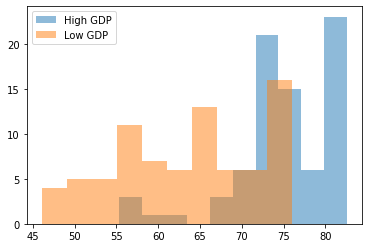

In [11]:
plt.hist(high_gdp["Life Expectancy"], alpha = 0.5, label = "High GDP")
plt.hist(low_gdp["Life Expectancy"], alpha = 0.5, label = "Low GDP")
plt.legend()
plt.show()

## Conclusion

At this point we can truly see the impact GDP has on life expectancy. Although we can confirm the common these days knowledge that countries with higher GDP indeed have a higher life expectancy, but moreover we can check this info for a specific data point. So let's again consider a country that has a life expectancy of 70 years. 

Based on the new data breakdown, we can say that it is below the first quartile and falls only in the first quarter of the high GDP dataset. At the same time, it is between the second and third quartile of the low GDP dataset, so it falls in the third quarter within it. One can conclude that such life expectancy is a good average, but certainly, there is room for positive growth.